In [1]:
import matplotlib.pyplot as plt
import yfinance as yf

# Se descargan los precios
precios =yf.download('FB', start = '2021-01-02', end = '2021-07-02')

#Se calcula la resta entre los precios de cierre y precio anterior para ver si hubo ganancia o perdida en dicho día.
delta = precios['Adj Close'].diff()

delta = delta[1:]    #Quita el valor NaN de la primear fecha

#Se generan dos columnas iguales las cuales se van a filtrar en el siguiente paso.
sube, baja =delta.copy(), delta.copy()

# Se filtra solo para días de ganancia
sube[sube < 0] = 0

# Se filtra solo para días de pérdida
baja[baja > 0] = 0

# Se calcula el promedio para el vector de ganancias como el de pérdidas,
#'n' es el lapso de tiempo en días del cálculo del promedio
n = 14
media_sube = sube.rolling(n).mean()
media_baja = baja.abs().rolling(n).mean()

RS =media_sube/media_baja            # RS "Fuerza Relativa"
precios['RSI'] = 100 -(100/(1+RS))   # RSI "Indice de Fuerza Relativa"

[*********************100%***********************]  1 of 1 completed


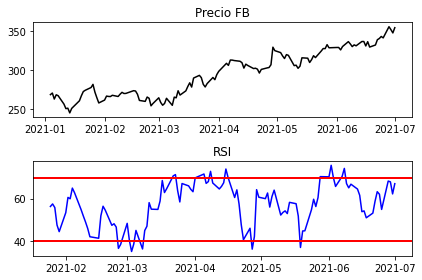

In [2]:
# Se grafica el valor de la acción y abajo el RSI

fig, axes =plt.subplots(2,1)
axes[0].plot(precios['Adj Close'], color ='black')
axes[1].plot(precios['RSI'], color = 'b')


axes[0].set_title('Precio FB')
axes[1].set_title('RSI')
axes[1].axhline(y = 40, color = 'r', linewidth=2)
axes[1].axhline(y = 70, color = 'r', linewidth=2)
plt.tight_layout()